In [41]:
%matplotlib inline
# from fastai.basics import *
import matplotlib.pyplot as plt
from torch import tensor, nn
import torch
import numpy as np

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) 
# x[:,0].uniform_(-1.,1)
# x[:5]
x

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1

In [4]:
# from fastai.basics import *

In [5]:
# uniform??

In [6]:
# uniform(-1.,1)

In [7]:
x[:,0].uniform_(-1.,1)

tensor([ 0.3879,  0.3565, -0.5212,  0.3128,  0.4936, -0.2005, -0.0145, -0.9457,
         0.7535, -0.7758, -0.0301,  0.4962, -0.4865,  0.5851, -0.3396,  0.1226,
         0.8956, -0.1924,  0.9375,  0.9383, -0.4320,  0.9886,  0.9651, -0.6600,
         0.7334, -0.0280, -0.8759,  0.0677, -0.4321, -0.7960,  0.3873,  0.5689,
         0.7065,  0.9934,  0.3777, -0.4283,  0.2023,  0.0064, -0.9722,  0.1749,
         0.6325, -0.6695,  0.7081,  0.6151, -0.8899,  0.5212,  0.7927, -0.3788,
         0.0685,  0.6146, -0.7302, -0.7302,  0.7855, -0.8029,  0.8297, -0.3740,
         0.7803,  0.4975,  0.4183,  0.6265,  0.4303,  0.1147, -0.2463,  0.1225,
        -0.3561, -0.2812,  0.2989,  0.4806,  0.0776, -0.9784, -0.2290, -0.5954,
         0.6504, -0.1827, -0.6008,  0.0418,  0.7910,  0.2145,  0.5577, -0.9970,
         0.3843, -0.5925,  0.4988,  0.8155, -0.1966,  0.9274, -0.9091,  0.4768,
         0.9117, -0.9530,  0.8296,  0.3742,  0.0370, -0.0475, -0.3269,  0.8846,
         0.5763,  0.9996, -0.2720,  0.87

In [8]:
x

tensor([[ 0.3879,  1.0000],
        [ 0.3565,  1.0000],
        [-0.5212,  1.0000],
        [ 0.3128,  1.0000],
        [ 0.4936,  1.0000],
        [-0.2005,  1.0000],
        [-0.0145,  1.0000],
        [-0.9457,  1.0000],
        [ 0.7535,  1.0000],
        [-0.7758,  1.0000],
        [-0.0301,  1.0000],
        [ 0.4962,  1.0000],
        [-0.4865,  1.0000],
        [ 0.5851,  1.0000],
        [-0.3396,  1.0000],
        [ 0.1226,  1.0000],
        [ 0.8956,  1.0000],
        [-0.1924,  1.0000],
        [ 0.9375,  1.0000],
        [ 0.9383,  1.0000],
        [-0.4320,  1.0000],
        [ 0.9886,  1.0000],
        [ 0.9651,  1.0000],
        [-0.6600,  1.0000],
        [ 0.7334,  1.0000],
        [-0.0280,  1.0000],
        [-0.8759,  1.0000],
        [ 0.0677,  1.0000],
        [-0.4321,  1.0000],
        [-0.7960,  1.0000],
        [ 0.3873,  1.0000],
        [ 0.5689,  1.0000],
        [ 0.7065,  1.0000],
        [ 0.9934,  1.0000],
        [ 0.3777,  1.0000],
        [-0.4283,  1

In [10]:
a = tensor([3.,2]);
a

tensor([3., 2.])

In [11]:
y = x@a + torch.rand(n)

In [12]:
y

tensor([ 4.0815,  3.2233,  0.8027,  3.0044,  3.6874,  2.2877,  2.6456,  0.0608,
         4.8486,  0.4652,  2.6552,  4.3388,  0.9283,  4.3645,  1.6123,  2.8003,
         4.8389,  1.5976,  5.2867,  5.5261,  0.8718,  5.2339,  5.0316,  0.9282,
         4.3567,  2.6589,  0.2707,  2.3143,  1.2103,  0.2057,  3.6626,  4.4853,
         4.2280,  5.5666,  3.3515,  1.6988,  2.9783,  2.4646,  0.0603,  3.3985,
         4.8300,  0.0501,  4.2334,  4.1838, -0.4351,  4.3802,  4.9089,  1.4462,
         2.5550,  4.7383, -0.1404,  0.7094,  4.8578, -0.1311,  5.4134,  1.1784,
         4.4654,  4.4714,  3.4180,  3.9634,  4.1866,  2.9545,  1.6693,  2.7327,
         1.5226,  1.3108,  3.8875,  4.2616,  2.6437, -0.3341,  2.1512,  0.7774,
         4.2354,  2.3972,  1.1152,  2.1745,  5.2818,  3.3859,  4.4595, -0.5438,
         3.2777,  0.5726,  4.3642,  5.3509,  1.9750,  5.5059,  0.1609,  3.6385,
         5.2334, -0.7661,  5.1243,  3.6194,  2.7338,  1.9882,  1.4374,  5.3129,
         4.5186,  5.9892,  1.7998,  5.00

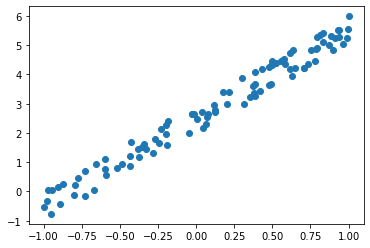

In [15]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [16]:
def mse(y_hat, y):
    return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [18]:
a = tensor([-1.,1])
a

tensor([-1.,  1.])

In [19]:
y

tensor([ 4.0815,  3.2233,  0.8027,  3.0044,  3.6874,  2.2877,  2.6456,  0.0608,
         4.8486,  0.4652,  2.6552,  4.3388,  0.9283,  4.3645,  1.6123,  2.8003,
         4.8389,  1.5976,  5.2867,  5.5261,  0.8718,  5.2339,  5.0316,  0.9282,
         4.3567,  2.6589,  0.2707,  2.3143,  1.2103,  0.2057,  3.6626,  4.4853,
         4.2280,  5.5666,  3.3515,  1.6988,  2.9783,  2.4646,  0.0603,  3.3985,
         4.8300,  0.0501,  4.2334,  4.1838, -0.4351,  4.3802,  4.9089,  1.4462,
         2.5550,  4.7383, -0.1404,  0.7094,  4.8578, -0.1311,  5.4134,  1.1784,
         4.4654,  4.4714,  3.4180,  3.9634,  4.1866,  2.9545,  1.6693,  2.7327,
         1.5226,  1.3108,  3.8875,  4.2616,  2.6437, -0.3341,  2.1512,  0.7774,
         4.2354,  2.3972,  1.1152,  2.1745,  5.2818,  3.3859,  4.4595, -0.5438,
         3.2777,  0.5726,  4.3642,  5.3509,  1.9750,  5.5059,  0.1609,  3.6385,
         5.2334, -0.7661,  5.1243,  3.6194,  2.7338,  1.9882,  1.4374,  5.3129,
         4.5186,  5.9892,  1.7998,  5.00

In [20]:
y_hat = x@a
y_hat

tensor([6.1211e-01, 6.4349e-01, 1.5212e+00, 6.8723e-01, 5.0635e-01, 1.2005e+00,
        1.0145e+00, 1.9457e+00, 2.4653e-01, 1.7758e+00, 1.0301e+00, 5.0380e-01,
        1.4865e+00, 4.1489e-01, 1.3396e+00, 8.7737e-01, 1.0443e-01, 1.1924e+00,
        6.2465e-02, 6.1678e-02, 1.4320e+00, 1.1407e-02, 3.4863e-02, 1.6600e+00,
        2.6655e-01, 1.0280e+00, 1.8759e+00, 9.3225e-01, 1.4321e+00, 1.7960e+00,
        6.1274e-01, 4.3114e-01, 2.9349e-01, 6.5691e-03, 6.2231e-01, 1.4283e+00,
        7.9767e-01, 9.9363e-01, 1.9722e+00, 8.2508e-01, 3.6751e-01, 1.6695e+00,
        2.9191e-01, 3.8495e-01, 1.8899e+00, 4.7883e-01, 2.0727e-01, 1.3788e+00,
        9.3153e-01, 3.8545e-01, 1.7302e+00, 1.7302e+00, 2.1447e-01, 1.8029e+00,
        1.7035e-01, 1.3740e+00, 2.1974e-01, 5.0252e-01, 5.8171e-01, 3.7352e-01,
        5.6975e-01, 8.8532e-01, 1.2463e+00, 8.7749e-01, 1.3561e+00, 1.2812e+00,
        7.0108e-01, 5.1941e-01, 9.2236e-01, 1.9784e+00, 1.2290e+00, 1.5954e+00,
        3.4961e-01, 1.1827e+00, 1.6008e+

In [21]:
y_hat = x@a
mse(y_hat, y)

tensor(9.8318)

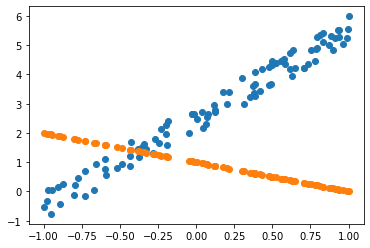

In [22]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [26]:
a = tensor([-1.,1])

a = nn.Parameter(a);
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [27]:
def update():
    
    y_hat = x@a
    
    loss = mse(y, y_hat)
    
    if t % 10 == 0: print(loss)
        
    loss.backward()
    
    with torch.no_grad():
        
        a.sub_(lr * a.grad)
        # a = a - (lr * a.grad)
        
        a.grad.zero_()

In [28]:
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [29]:
t = 100000
lr = 0.001
update()

tensor(9.8318, grad_fn=<MeanBackward0>)


In [30]:
a

Parameter containing:
tensor([-0.9967,  1.0040], requires_grad=True)

In [31]:
lr = 1e-1
for t in range(100):
    update()

tensor(9.8044, grad_fn=<MeanBackward0>)
tensor(1.2269, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.1483, grad_fn=<MeanBackward0>)
tensor(0.1016, grad_fn=<MeanBackward0>)
tensor(0.0905, grad_fn=<MeanBackward0>)
tensor(0.0879, grad_fn=<MeanBackward0>)
tensor(0.0873, grad_fn=<MeanBackward0>)
tensor(0.0871, grad_fn=<MeanBackward0>)
tensor(0.0871, grad_fn=<MeanBackward0>)


In [32]:
a

Parameter containing:
tensor([2.9850, 2.5373], requires_grad=True)

In [35]:
x@a.detach().numpy()

tensor([ 3.6951,  3.6014,  0.9815,  3.4709,  4.0108,  1.9388,  2.4939, -0.2856,
         4.7863,  0.2215,  2.4475,  4.0184,  1.0852,  4.2838,  1.5235,  2.9033,
         5.2105,  1.9629,  5.3357,  5.3381,  1.2478,  5.4882,  5.4181,  0.5673,
         4.7266,  2.4537, -0.0774,  2.7395,  1.2475,  0.1613,  3.6932,  4.2353,
         4.6462,  5.5026,  3.6646,  1.2589,  3.1412,  2.5563, -0.3648,  3.0594,
         4.4252,  0.5387,  4.6509,  4.3732, -0.1190,  4.0929,  4.9035,  1.4064,
         2.7416,  4.3717,  0.3577,  0.3575,  4.8820,  0.1405,  5.0137,  1.4210,
         4.8663,  4.0222,  3.7858,  4.4073,  3.8215,  2.8796,  1.8019,  2.9029,
         1.4743,  1.6978,  3.4295,  3.9718,  2.7690, -0.3831,  1.8536,  0.7601,
         4.4786,  1.9918,  0.7439,  2.6619,  4.8983,  3.1774,  4.2021, -0.4387,
         3.6845,  0.7687,  4.0263,  4.9715,  1.9505,  5.3054, -0.1764,  3.9605,
         5.2586, -0.3075,  5.0136,  3.6543,  2.6478,  2.3956,  1.5615,  5.1777,
         4.2574,  5.5211,  1.7253,  5.13

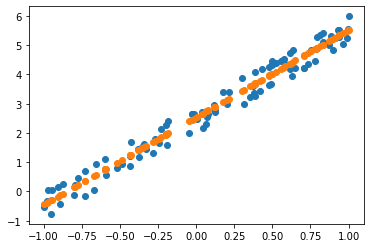

In [36]:
plt.scatter(x[:,0], y)
# plt.scatter(x[:,0], x@a);
plt.scatter(x[:,0], x@a.detach().numpy());

## Animate it!

In [37]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [43]:
a = nn.Parameter(tensor([-1.,1]))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.